<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Import-Stuff" data-toc-modified-id="Import-Stuff-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Stuff</a></span></li><li><span><a href="#Tidy-Data" data-toc-modified-id="Tidy-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Tidy Data</a></span></li><li><span><a href="#Some-Anonymous-Functions" data-toc-modified-id="Some-Anonymous-Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Some Anonymous Functions</a></span></li><li><span><a href="#Named-Functions" data-toc-modified-id="Named-Functions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Named Functions</a></span></li><li><span><a href="#Tidy-Data" data-toc-modified-id="Tidy-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Tidy Data</a></span></li></ul></li><li><span><a href="#Draft-Analysis" data-toc-modified-id="Draft-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Draft Analysis</a></span></li><li><span><a href="#Main-Body" data-toc-modified-id="Main-Body-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Main Body</a></span><ul class="toc-item"><li><span><a href="#Look-at-Distribution-of-Individual-and-Total-Dipole" data-toc-modified-id="Look-at-Distribution-of-Individual-and-Total-Dipole-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Look at Distribution of Individual and Total Dipole</a></span></li><li><span><a href="#Total-vs-Individual" data-toc-modified-id="Total-vs-Individual-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Total vs Individual</a></span></li><li><span><a href="#Ferro-vs-Antiferro" data-toc-modified-id="Ferro-vs-Antiferro-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ferro vs Antiferro</a></span></li><li><span><a href="#Compare-Potential-Maps" data-toc-modified-id="Compare-Potential-Maps-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Compare Potential Maps</a></span><ul class="toc-item"><li><span><a href="#Collect-Data" data-toc-modified-id="Collect-Data-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Collect Data</a></span><ul class="toc-item"><li><span><a href="#Need-to-add-the-energies-for-the-new-potential-map.-Did-not-originally-collect" data-toc-modified-id="Need-to-add-the-energies-for-the-new-potential-map.-Did-not-originally-collect-3.4.1.1"><span class="toc-item-num">3.4.1.1&nbsp;&nbsp;</span>Need to add the energies for the new potential map. Did not originally collect</a></span></li></ul></li><li><span><a href="#Compare-Maps" data-toc-modified-id="Compare-Maps-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Compare Maps</a></span></li></ul></li></ul></li></ul></div>

# Setup

## Import Stuff

In [3]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as GS
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set()

try:
    with open("tidy_data/pc_vacuum.pkl","rb") as file_in:
        raw_data = pkl.load(file_in)
        print("Pickled data sucessfully loaded.")
        raw_df = pd.DataFrame(raw_data)
except:
    print("Error loading data.")
    
print("Extracting system info.")
infos = []
for idx,row in raw_df.iterrows():
    infos.append(row.sys_info)
    
info_df = pd.DataFrame(infos)
info_df.head()
raw_df = (pd.concat([raw_df,info_df],axis=1)
          .drop(["fpath","sys_info"],axis=1))
print("Done.")
raw_df.head()


Pickled data sucessfully loaded.
Extracting system info.
Done.


,dipoles,total_dipole,config,couple,fill,run
0,"[1.8700516618280878, 26.966134335213575, 1.875...",92.526155,40,antiferro,1110,17
1,"[1.801778917021801, 1.8002584492229237, 1.8012...",89.449518,44,ferro,1111,10
2,"[1.8759304978787896, 2.488008059944512, 2.4986...",89.178644,1,antiferro,1110,11
3,[1.8482691119110115],1.848269,34,ferro,1000,21
4,"[1.853148457244691, 1.8548880179750231]",89.158633,39,antiferro,1010,23


## Some Anonymous Functions

In [4]:
filter_by_fill = lambda fill,df: df[df.fill == fill]
filter_by_couple = (lambda couple,df: df[df.couple == couple]
                    .sort_values(["config","run"],axis=0))
                   # .set_index(["config"]))
filter_by_config = lambda config,df: df[df.config == config]
filter_by_type = lambda type_,df: df[df.type == type_]
flatten = lambda x: [j for i in x for j in i]
get_dipoles = lambda df: flatten(df.dipoles.values)
get_total_dipole = lambda df: df.total_dipole.values

drop_outliers = lambda df: df.drop(df.index[return_outliers(df.total_dipole)])

## Named Functions

In [5]:
def reject_outliers(data, m = 1.):
        '''Used modified Z-score itl.nist.gov/div898/handbook/eda/section3/eda35h.htm '''
        data = np.array(data)
        d = np.abs(data - np.median(data))
        mdev = np.median(d)
        s = d/mdev if mdev else 0.
        return data[s<m]
    
def return_outliers(data, m = 1.0):
    '''Used modified Z-score itl.nist.gov/div898/handbook/eda/section3/eda35h.htm '''
    data = np.array(data)
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    reject = list(data[s>=m])
    return [list(data).index(i) for i in reject]


def get_fill_df(couple,fill,m=1.0):   
    entries = []
    for config in list(set(raw_df.config.values)):
        
        try:
            df = filter_by_config(config,filter_by_couple(couple,filter_by_fill(fill,raw_df)))
            dipoles = get_dipoles(df)
            total_dipole = get_total_dipole(df)
            df = drop_outliers(df)
            clean_dipoles = get_dipoles(df)
            clean_total_dipole = get_total_dipole(df)

            entry = {'couple':couple, 'fill':fill, 'config':config, 
                     'raw_dipoles':dipoles,'clean_dipoles':clean_dipoles,
                     'raw_total_dipole':total_dipole,'clean_total_dipole':clean_total_dipole}

            entries.append(entry)
        except:
            print("Error: {} {} {} ".format(couple,fill,config))
        
    return pd.DataFrame(entries)

def plot_dipole_distribution_fill(couple=None,fill=None,ax=None):
    df = get_fill_df(couple,fill,m=1.0)
    plt.title("Fill: {}  Couple: {}".format(fill,couple.upper()))
    sns.distplot(flatten(df.clean_total_dipole.values),label="Total Dipole"); 
    sns.distplot(flatten(df.clean_dipoles.values),label="Dipole");
    ax.legend();
    ax.set(xlabel="Dipole [Debye]",ylabel="Count [a.u.]",xlim=[-25,100]);
    
def plot_dipole_distribution_couple(type_=None,fill=None,ax=None):
    
    type_dict = {'total':'clean_total_dipole', 'indiv':'clean_dipoles'}
    try:
        ty = type_dict[type_]
    except:
        print("Invalid type. Use 'total' or 'indiv'")
        return
    plt.title("Fill: {}  Type: {}".format(fill,ty.upper()))
    f_df = get_fill_df("ferro",fill,m=1.0)
    sns.distplot(flatten(f_df[ty].values),label="Ferro");
    if fill != 1000:
        a_df = get_fill_df("antiferro",fill,m=1.0)
        sns.distplot(flatten(a_df[ty].values),label="Antiferro"); 
    
    ax.legend();
    if type_ == "total":
        ax.set(xlabel="Dipole [Debye]",ylabel="Count [a.u.]",xlim=[-5,15]);
    else:
        ax.set(xlabel="Dipole [Debye]",ylabel="Count [a.u.]",xlim=[-25,125]);
        

def make_total_individual_plot(m=1.):
    fills = set(raw_df.fill.values)
    couples = set(raw_df.couple.values)
    types= "total indiv".split()
    #fills.sort()

    gs = GS.GridSpec(5,2);
    fig = plt.figure(figsize=(16,16));


    for row,fill in enumerate(fills):
        for col,type_ in enumerate(types):
            ax = fig.add_subplot(gs[row,col]);
            fig.subplots_adjust(hspace=0.5)
            plot_dipole_distribution_couple(type_=type_,fill=fill,ax=ax)
            

def make_fill_couple_plot():
    fills = set(raw_df.fill.values)
    couples = set(raw_df.couple.values)


    gs = GS.GridSpec(4,2);
    fig = plt.figure(figsize=(16,16));


    for row,fill in enumerate(fills):
        for col,couple in enumerate(couples):
            if not ((fill == 1000) and (couple == "antiferro")): # DNE
                ax = fig.add_subplot(gs[row,col]);
                fig.subplots_adjust(hspace=0.5)
                plot_dipole_distribution_fill(couple=couple,fill=fill,ax=ax)

## Tidy Data

In [6]:
fill_dfs = {}
for fill in [1000,1010,1100,1110,1111]:
    df = filter_by_fill(fill,raw_df).sort_values(["config","run"])
    fill_dfs[fill] = df
    for config in np.arange(60):
        config_df = filter_by_config(config,fill_dfs[fill])
        mask = return_outliers(config_df.total_dipole)
        rm = config_df.iloc[mask].index.values
        fill_dfs[fill].drop(rm,axis=0,inplace=True)


tidy_results = []

for key in fill_dfs.keys():
    df = fill_dfs[key]
    for idx,row in df.iterrows():
        couple = row['couple']
        config = int(row['config'])
        fill = int(row['fill'])
        run = int(row['run'])
        dipoles = row.dipoles
        total_dipole = row.total_dipole

        for d in dipoles:
            tidy = {'couple':couple,'config':config,'fill':fill,
                    'run':run,'type':'dipole','value':d}
            tidy_results.append(tidy)

        tidy = {'couple':couple,'config':config,'fill':fill,
                'run':run,'type':'total_dipole','value':total_dipole}

        tidy_results.append(tidy)

tidy_df = pd.DataFrame(tidy_results)
tidy_df.head()

,config,couple,fill,run,type,value
0,0,ferro,1000,0,dipole,1.850388
1,0,ferro,1000,0,total_dipole,1.850388
2,0,ferro,1000,4,dipole,1.853036
3,0,ferro,1000,4,total_dipole,1.853036
4,0,ferro,1000,6,dipole,1.852495


# Draft Analysis

0


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


10
20
30
40
50


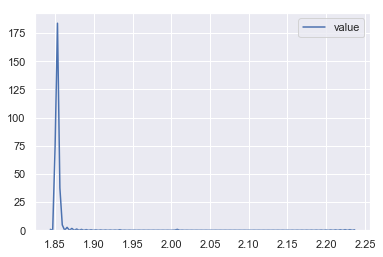

In [7]:
fill_1000_df = filter_by_fill(1000,tidy_df).sort_values(["config","run","type"])
sns.kdeplot(fill_1000_df.value)

total_1000_df = filter_by_type('total_dipole',fill_1000_df).drop(['fill','couple','type','run'],axis=1)
clean_total_1000_df = pd.DataFrame(columns="config value".split())
for i in set(total_1000_df.config):
    if i%10 == 0:
        print(i)
    config = filter_by_config(i,total_1000_df)
    outliers = return_outliers(config.value.values)
    config.drop([config.index[i] for i in outliers],inplace=True)
    clean_total_1000_df = pd.concat([clean_total_1000_df,config])
        
#fig = plt.figure(figsize=(18,18))
#ax = plt.gca()
#sns.barplot(x="config",y="value",data=total_1000_df,ax=ax)


[(1, 3)]

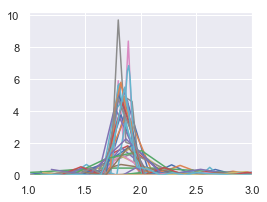

In [8]:
df = filter_by_fill(1111,tidy_df)
df_d = filter_by_type('dipole',df)
df_td = filter_by_type('total_dipole',df)



fig = plt.figure(figsize=(4,3))
ax = plt.gca()
for i in np.arange(60):
    config = filter_by_config(i,df_d)
    sns.kdeplot(config.value.values,ax=ax)
ax.set(xlim=[1,3])

# Main Body

## Look at Distribution of Individual and Total Dipole

## Total vs Individual

In [ ]:
make_total_individual_plot()

## Ferro vs Antiferro

In [ ]:
make_fill_couple_plot()


## Compare Potential Maps

### Collect Data

In [ ]:
path = "../../potential_map/broad_sweep/tidy_data/pmap_antiferro_1110.pkl"
with open(path,"rb") as file_in:
    orig_df = pkl.load(file_in)
    

orig_df = orig_df.sort_values("config")
new_df = filter_by_fill(1010,raw_df).sort_values("config")
new_df = filter_by_couple("antiferro",new_df[new_df.run == 0])



#### Need to add the energies for the new potential map. Did not originally collect

In [ ]:
new_en = pkl.load(open("tidy_data/pc_antiferro_1110_energy.pkl","rb"))
new_en_df = pd.DataFrame(new_en)
new_en_df.config = new_en_df.config.apply(int)

new_en_df = new_en_df.sort_values("config",axis=0)
new_en_df.head()


In [ ]:
new_df["angle"] = new_df.config.values*0.6/60
orig_df["angle"] = orig_df.config.values*np.pi/3/100

### Compare Maps

In [ ]:
def plot_map(df=None,ax=None):
    sns.lineplot(x="angle",y="energy",data=df,ax=ax)
    
def zero_energy(df):
    zero_en = df.energy.values[0]
    df.energy -= zero_en
    return df

In [ ]:

plot_map(zero_energy(orig_df))
plot_map(zero_energy(new_df))

In [ ]:
plot_map(zero_energy(new_df))